In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from tqdm import trange
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score

In [3]:
df = pd.read_csv('data1forEx1to4/train1_icu_data.csv')
mm = StandardScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_label = pd.read_csv('data1forEx1to4/train1_icu_label.csv')
df['label'] = df_label['hospital_death']

In [4]:
df_test = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
df_test = pd.DataFrame(mm.transform(df_test), columns=df_test.columns)
df_test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv')
df_test['label'] = df_test_label['hospital_death']

training_accuracy, test_accuracy = [], []
for i in trange(1, 200, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(df.drop('label', axis=1), df['label'])

    training_accuracy.append(accuracy_score(df['label'], clf.predict(df.drop('label', axis=1))))
    test_accuracy.append(accuracy_score(df_test['label'], clf.predict(df_test.drop('label', axis=1))))

100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


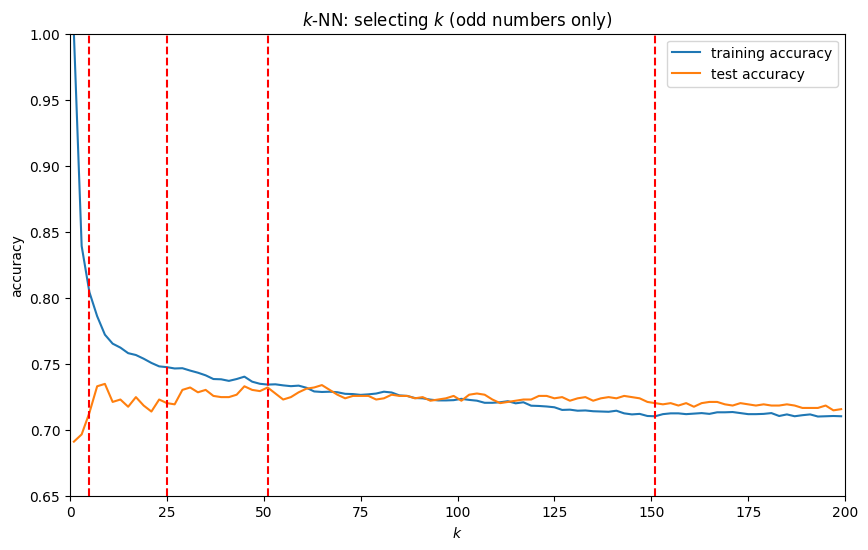

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 200, 2), training_accuracy, label='training accuracy')
plt.plot(range(1, 200, 2), test_accuracy, label='test accuracy')
plt.axis([0, 200, 0.65, 1])
plt.xlabel('$k$'); plt.ylabel('accuracy')
plt.title('$k$-NN: selecting $k$ (odd numbers only)')
plt.vlines([5, 25, 51, 151], 0.65, 1, colors='r', linestyles='dashed')
plt.legend()
plt.savefig('selecting-k.png', dpi=180)
plt.show()

In [6]:
def plot_roc(ax, axins, i, train_color: str, test_color: str):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(df.drop('label', axis=1), df['label'])

    train_score = clf.predict_proba(df.drop('label', axis=1))[:,1]
    fpr_train, tpr_train, _ = roc_curve(df['label'], train_score)
    roc_auc_train = auc(fpr_train, tpr_train)

    test_score = clf.predict_proba(df_test.drop('label', axis=1))[:,1]
    fpr_test, tpr_test, _ = roc_curve(df_test['label'], test_score)
    roc_auc_test = auc(fpr_test, tpr_test)

    ax.plot(fpr_train, tpr_train, color=train_color, lw=1.5, label='$k$={}: training ROC curve (area = {:.3f})'.format(i, roc_auc_train))
    ax.plot(fpr_test, tpr_test, color=test_color, lw=1.5, label='$k$={}: test ROC curve (area = {:.3f})'.format(i, roc_auc_test))

    axins.plot(fpr_train, tpr_train, color=train_color, lw=1.5)
    axins.plot(fpr_test, tpr_test, color=test_color, lw=1.5)

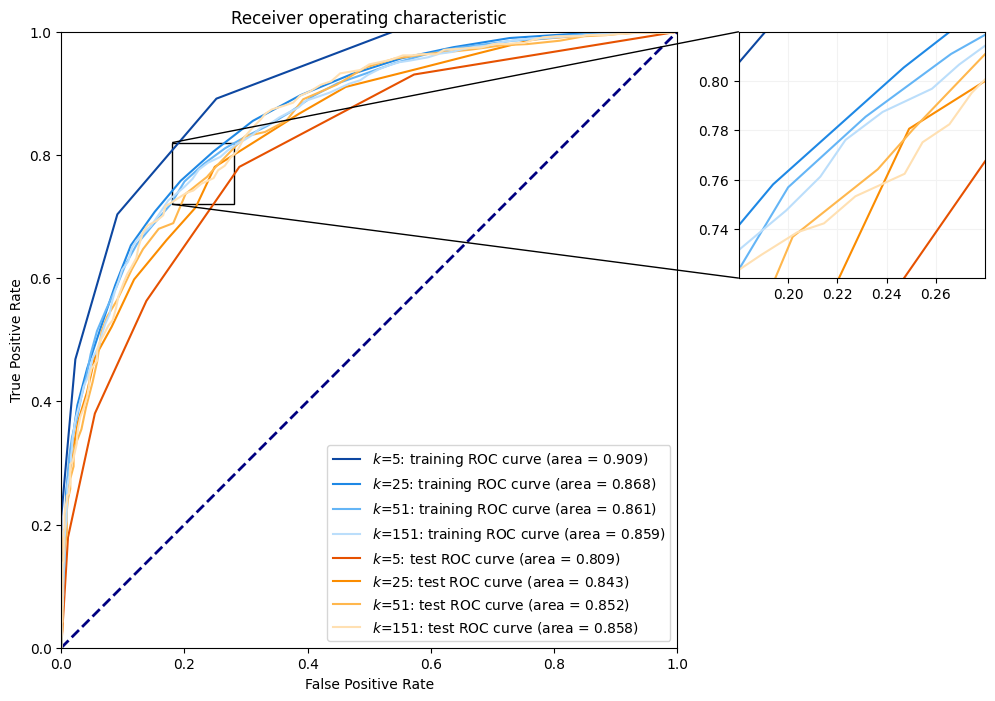

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.axis('square')

axins = ax.inset_axes((1.1, 0.6, 0.4, 0.4))
axins.set_xlim([0.18, 0.28]); axins.set_ylim([0.72, 0.82])
axins.set_xticks(np.arange(0.2, 0.27, 0.02)); axins.set_yticks(np.arange(0.74, 0.8, 0.02)); axins.grid(color='#f2f2f2')

plot_roc(ax, axins, 5, '#0D47A1', '#E65100')
plot_roc(ax, axins, 25, '#1E88E5', '#FB8C00')
plot_roc(ax, axins, 51, '#64B5F6', '#FFB74D')
plot_roc(ax, axins, 151, '#BBDEFB', '#FFE0B2')
ax.set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
handles, labels = ax.get_legend_handles_labels()
order = np.arange(len(handles)).reshape(-1, 2).T.flatten()
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc="lower right")

mark_inset(ax, axins, loc1=3, loc2=2, fc="none", ec='k', lw=1)

plt.show()  

In [8]:
training_accuracy, test_accuracy = [], []
for i in trange(1, 10):
    clf = KNeighborsClassifier(n_neighbors=25, p=i)
    clf.fit(df.drop('label', axis=1), df['label'])

    training_accuracy.append(accuracy_score(df['label'], clf.predict(df.drop('label', axis=1))))
    test_accuracy.append(accuracy_score(df_test['label'], clf.predict(df_test.drop('label', axis=1))))

100%|██████████| 9/9 [00:39<00:00,  4.34s/it]


In [9]:
clf = KNeighborsClassifier(n_neighbors=25, metric='chebyshev')
clf.fit(df.drop('label', axis=1), df['label'])

training_accuracy.append(accuracy_score(df['label'], clf.predict(df.drop('label', axis=1))))
test_accuracy.append(accuracy_score(df_test['label'], clf.predict(df_test.drop('label', axis=1))))

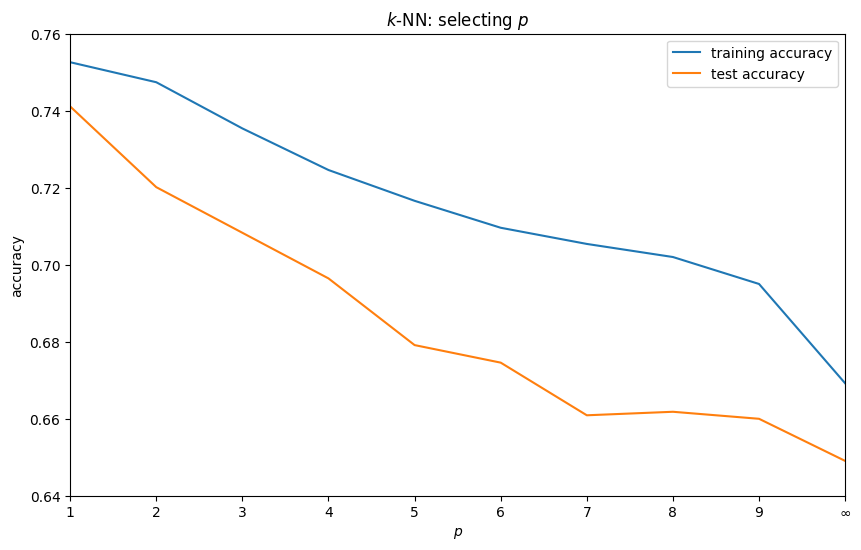

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_accuracy, label='training accuracy')
plt.plot(range(1, 11), test_accuracy, label='test accuracy')
plt.axis([1, 10, 0.64, 0.76])
plt.xticks(range(1, 11), [str(i) for i in range(1, 10)] + [r'$\infty$'])
plt.xlabel('$p$'); plt.ylabel('accuracy')
plt.title('$k$-NN: selecting $p$')
plt.legend()
plt.savefig('selecting-p.png', dpi=180)
plt.show()

In [20]:
training_accuracy, test_accuracy = [], []
for i in trange(1, 60):
    clf = KNeighborsClassifier(n_neighbors=25, leaf_size=i)
    clf.fit(df.drop('label', axis=1), df['label'])

    training_accuracy.append(accuracy_score(df['label'], clf.predict(df.drop('label', axis=1))))
    test_accuracy.append(accuracy_score(df_test['label'], clf.predict(df_test.drop('label', axis=1))))

100%|██████████| 59/59 [00:09<00:00,  6.51it/s]


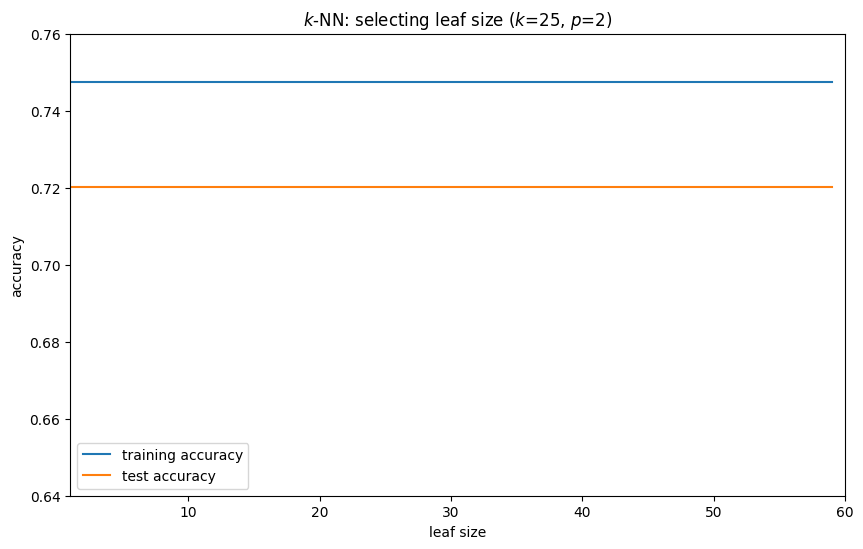

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 60), training_accuracy, label='training accuracy')
plt.plot(range(1, 60), test_accuracy, label='test accuracy')
plt.axis([1, 60, 0.64, 0.76])
plt.xlabel('leaf size'); plt.ylabel('accuracy')
plt.title('$k$-NN: selecting leaf size ($k$=25, $p$=2)')
plt.legend()
plt.savefig('selecting-leaf-size.png', dpi=180)
plt.show()